In [50]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load the dataset
df = pd.read_csv("./datasets/stock_prices.csv")

In [52]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Check for missing or duplicate values
print("Missing values:", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

Missing values: date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
type         0
code         0
name         0
dtype: int64
Duplicate rows: 0


In [53]:
df

,date,open,high,low,close,adj_close,volume,type,code,name
0,1966-02-08,2.703700,2.736630,2.604940,2.685190,0.725169,4865600,stock,BA,The Boeing Company
1,1966-02-08,3.812500,3.833330,3.750000,3.781250,0.352049,372000,stock,CAT,Caterpillar Inc.
2,1966-02-08,0.000000,5.046880,4.976560,4.992190,0.087587,105600,stock,CVX,Chevron Corporation
3,1966-02-08,0.149645,0.152214,0.149003,0.149645,0.097680,1401300,stock,DIS,The Walt Disney Company
4,1966-02-08,8.370830,8.475000,8.366670,8.468750,2.064010,659200,stock,IBM,International Business Machines Corporation
...,...,...,...,...,...,...,...,...,...,...
338,1966-03-21,0.141296,0.144507,0.141296,0.141938,0.092827,4554200,stock,DIS,The Walt Disney Company
339,1966-03-21,8.366670,8.483330,8.366670,8.483330,2.067560,347200,stock,IBM,International Business Machines Corporation
340,1966-03-21,0.000000,0.409722,0.407407,0.407407,0.134961,604800,stock,JNJ,Johnson & Johnson
341,1966-03-21,0.414062,0.415365,0.414062,0.414062,0.007296,614400,stock,KO,The Coca-Cola Company


In [54]:
df.set_index('date', inplace=True)


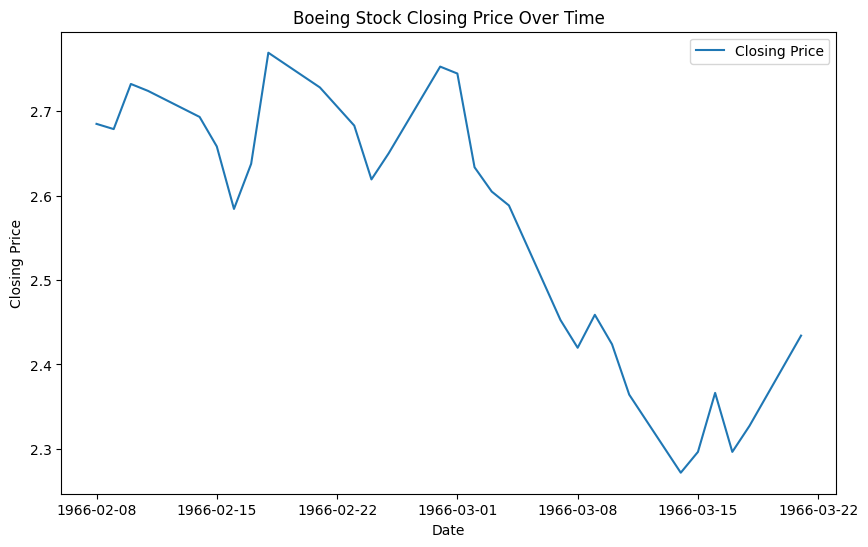

In [55]:
boeing_data = df[df['code'] == 'BA']
plt.figure(figsize=(10,6))
plt.plot(boeing_data.index, boeing_data['close'], label='Closing Price')
plt.title('Boeing Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


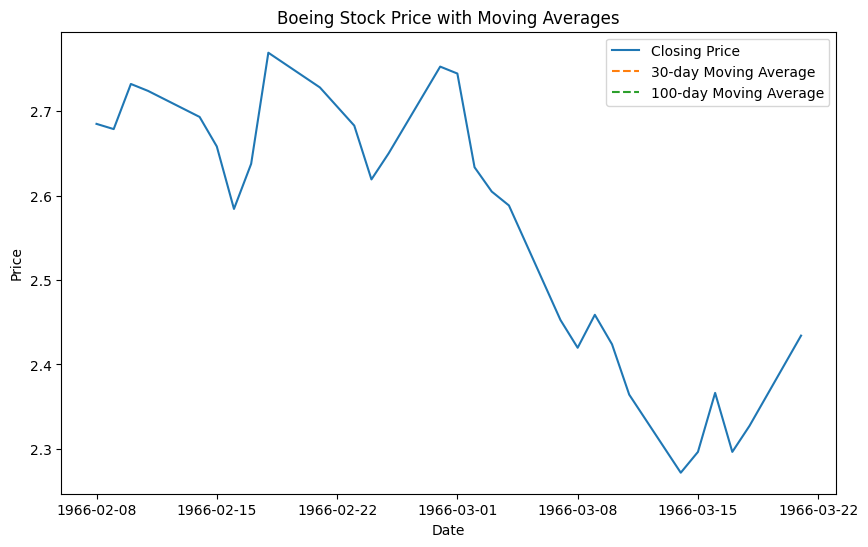

In [56]:
# --- Step 3: Moving Averages and Trend Analysis ---

# Calculate 30-day and 100-day moving averages
boeing_data['SMA30'] = boeing_data['close'].rolling(window=30).mean()
boeing_data['SMA100'] = boeing_data['close'].rolling(window=100).mean()

# Plot the closing prices and moving averages
plt.figure(figsize=(10,6))
plt.plot(boeing_data.index, boeing_data['close'], label='Closing Price')
plt.plot(boeing_data.index, boeing_data['SMA30'], label='30-day Moving Average', linestyle='--')
plt.plot(boeing_data.index, boeing_data['SMA100'], label='100-day Moving Average', linestyle='--')
plt.title('Boeing Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

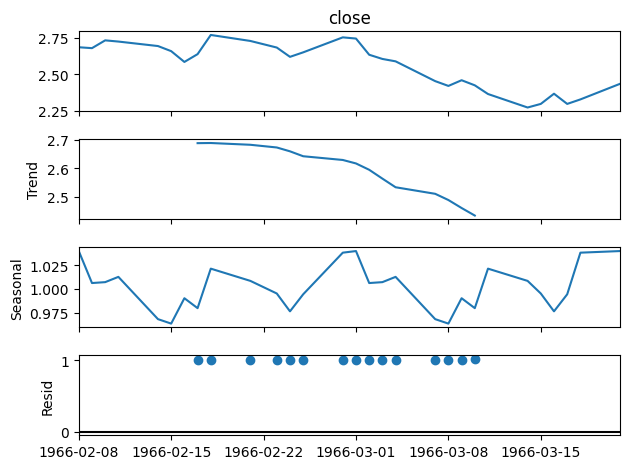

Correlation between closing price and volume: -0.1058750522147261


In [58]:
# --- Step 4: Seasonality Analysis ---

# Decompose the time series to analyze seasonality
result = seasonal_decompose(boeing_data['close'], model='multiplicative', period=14)
result.plot()
plt.show()

# --- Step 5: Correlation Analysis ---

# Calculate correlation between closing price and volume
correlation = boeing_data['close'].corr(boeing_data['volume'])
print(f'Correlation between closing price and volume: {correlation}')

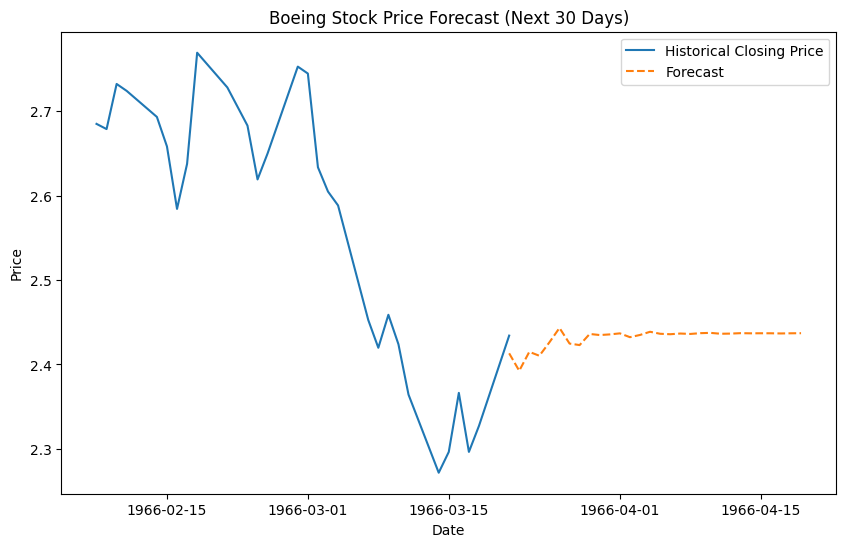

In [59]:
# --- Step 6: Time Series Forecasting (ARIMA) ---

# Fit an ARIMA model to the data (p, d, q values need to be optimized based on ACF and PACF plots)
model = ARIMA(boeing_data['close'], order=(5,1,0))  # Example parameters (p=5, d=1, q=0)
model_fit = model.fit()

# Make forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(boeing_data.index, boeing_data['close'], label='Historical Closing Price')
plt.plot(pd.date_range(boeing_data.index[-1], periods=30, freq='D'), forecast, label='Forecast', linestyle='--')
plt.title('Boeing Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()